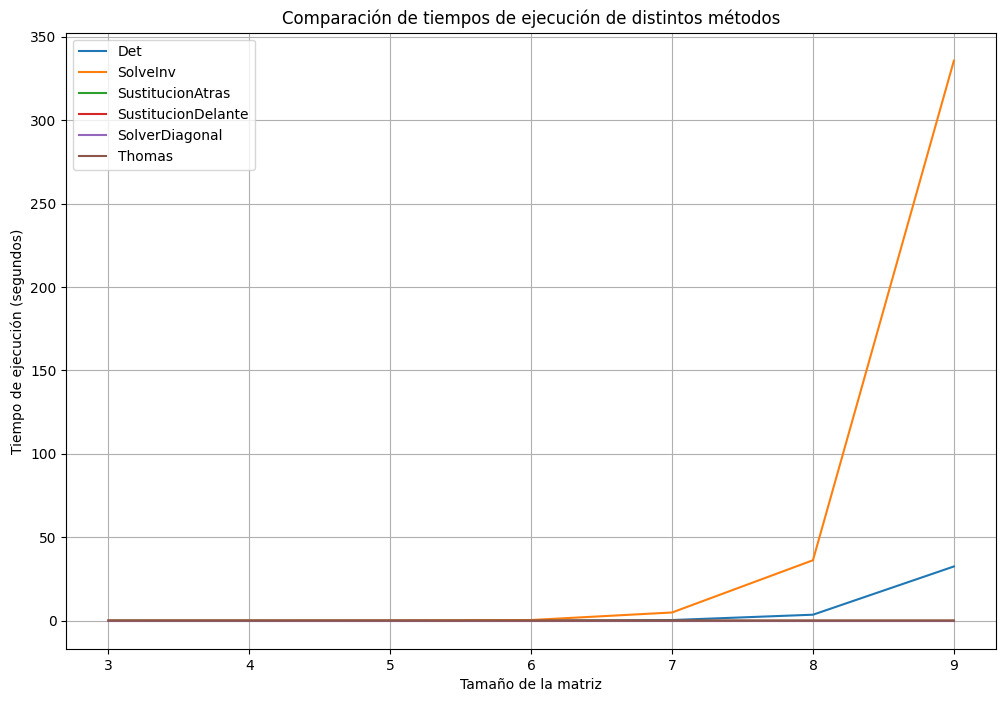

In [6]:
import numpy as np
import timeit
import matplotlib.pyplot as plt


# Implementación del Algoritmo de Thomas

def Thomas(DP, DS, DI, b):
    """
    Resuelve un sistema de ecuaciones lineales tridiagonal usando el algoritmo de Thomas.

    Parámetros:
    - DP: Array de la diagonal principal.
    - DS: Array de la diagonal superior (un elemento menos que DP).
    - DI: Array de la diagonal inferior (un elemento menos que DP).
    - b: Vector de términos independientes.

    Retorna:
    - x: Solución del sistema de ecuaciones.
    """
    n = len(DP)
    x = np.zeros(n)

    # Proceso de eliminación progresiva
    for i in range(1, n):
        factor = DI[i - 1] / DP[i - 1]
        DP[i] -= factor * DS[i - 1]
        b[i] -= factor * b[i - 1]

    # Sustitución regresiva
    x[-1] = b[-1] / DP[-1]
    for i in range(n - 2, -1, -1):
        x[i] = (b[i] - DS[i] * x[i + 1]) / DP[i]

    return x


# Métodos de Resolución de Sistemas


def SustitucionDelante(Mat, b):
    """
    Resuelve un sistema de ecuaciones con una matriz triangular inferior
    utilizando sustitución hacia adelante.

    Parámetros:
    - Mat: Matriz triangular inferior.
    - b: Vector de términos independientes.

    Retorna:
    - x: Vector solución.
    """
    n = Mat.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(Mat[i, :i], x[:i])) / Mat[i, i]
    return x


def SustitucionAtras(Mat, b):
    """
    Resuelve un sistema de ecuaciones con una matriz triangular superior
    utilizando sustitución hacia atrás.

    Parámetros:
    - Mat: Matriz triangular superior.
    - b: Vector de términos independientes.

    Retorna:
    - x: Vector solución.
    """
    n = Mat.shape[0]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(Mat[i, i+1:], x[i+1:])) / Mat[i, i]
    return x


def SolverDiagonal(A, b):
    """
    Resuelve un sistema de ecuaciones con una matriz diagonal.

    Parámetros:
    - A: Matriz diagonal.
    - b: Vector de términos independientes.

    Retorna:
    - x: Vector solución.
    """
    n = len(A)
    x = np.zeros_like(A, dtype=float)
    for i in range(n):
        x[i] = b[i] / A[i]
    return x



# Métodos de Manipulación de Matrices


def SubMat(Mat, ren, col):
    """
    Genera una submatriz eliminando un renglón y una columna de la matriz dada.

    Parámetros:
    - Mat: Matriz original.
    - ren: Índice del renglón a eliminar.
    - col: Índice de la columna a eliminar.

    Retorna:
    - Matriz resultante sin el renglón y la columna especificados.
    """
    M1 = np.copy(Mat)
    M1 = np.delete(M1, ren, axis=0)
    M1 = np.delete(M1, col, axis=1)
    return M1


def Det(Mat):
    """
    Calcula el determinante de una matriz cuadrada de manera recursiva.

    Parámetro:
    - Mat: Matriz cuadrada.

    Retorna:
    - Determinante de la matriz.
    """
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - Mat[0][1] * Mat[1][0]

    deter = 0.0
    for col in range(Mat.shape[0]):
        deter += ((-1) ** col) * Mat[0][col] * Det(SubMat(Mat, 0, col))
    return deter


def Transpuesta(Mat):
    """
    Calcula la transpuesta de una matriz cuadrada modificando la matriz original.

    Parámetro:
    - Mat: Matriz cuadrada.

    Retorna:
    - Matriz transpuesta.
    """
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            if ren < col:
                Mat[ren, col], Mat[col, ren] = Mat[col, ren], Mat[ren, col]
    return Mat


def Cofactores(Mat):
    """
    Calcula la matriz de cofactores de una matriz cuadrada.

    Parámetro:
    - Mat: Matriz cuadrada.

    Retorna:
    - Matriz de cofactores.
    """
    Cofa = np.zeros_like(Mat, dtype=float)
    for ren in range(Mat.shape[0]):
        for col in range(Mat.shape[1]):
            Cofa[ren, col] = ((-1) ** (ren + col)) * Det(SubMat(Mat, ren, col))
    return Cofa


def Inv(Mat):
    """
    Calcula la inversa de una matriz cuadrada utilizando la matriz de cofactores.

    Parámetro:
    - Mat: Matriz cuadrada.

    Retorna:
    - Matriz inversa.

    Lanza:
    - ValueError si la matriz es singular (determinante = 0).
    """
    deter = Det(Mat)
    if deter == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")

    Cofac = Cofactores(Mat)
    Cofac = Transpuesta(Cofac)
    Inversa = (1 / deter) * Cofac
    return Inversa


def SolveInv(Mat, vec):
    """
    Resuelve un sistema de ecuaciones usando la matriz inversa.

    Parámetros:
    - Mat: Matriz cuadrada de coeficientes.
    - vec: Vector de términos independientes.

    Retorna:
    - x: Solución del sistema de ecuaciones.
    """
    InvMat = Inv(Mat)
    return InvMat @ vec



# Medición de tiempos de ejecución


tamaño = range(3, 10, 1)
execution_times = {
    "Det": [],
    "SolveInv": [],
    "SustitucionAtras": [],
    "SustitucionDelante": [],
    "SolverDiagonal": [],
    "Thomas": []
}

for n in tamaño:
    A = np.random.rand(n, n)
    b = np.random.rand(n)
    diagonal = np.diag(A)
    DP = np.copy(diagonal)
    DS = np.copy(diagonal[:-1])
    DI = np.copy(diagonal[:-1])


    execution_times["Det"].append(timeit.timeit(lambda: Det(A), number=10))
    execution_times["SolveInv"].append(timeit.timeit(lambda: SolveInv(A, b), number=10))
    execution_times["SustitucionAtras"].append(timeit.timeit(lambda: SustitucionAtras(np.triu(A), b), number=10))
    execution_times["SustitucionDelante"].append(timeit.timeit(lambda: SustitucionDelante(np.tril(A), b), number=10))
    execution_times["SolverDiagonal"].append(timeit.timeit(lambda: SolverDiagonal(A, b), number=10))
    execution_times["Thomas"].append(timeit.timeit(lambda: Thomas(DP.copy(), DS.copy(), DI.copy(), b.copy()), number=10))

# Graficar los tiempos de ejecución
plt.figure(figsize=(12, 8))
for method, times in execution_times.items():
    plt.plot(tamaño, times, label=method)

plt.xlabel("Tamaño de la matriz")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Comparación de tiempos de ejecución de distintos métodos")
plt.legend()
plt.grid()
plt.show()
